In [1]:
import warnings
warnings.filterwarnings("ignore")



import pandas as pd
import numpy as np
from matplotlib import pyplot

**Downloading Data**

In [2]:
filepath="/Users/shwetapai/Desktop/amazon_reviews/reviewdata.csv"

df_review=pd.read_csv(filepath)
df_review.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']
df_review.head()

,id,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,...,doRecommend,id,numHelpful,rating,sourceURLs,text,title,userCity,userProvince,username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


**Unique names of all products**

In [3]:
df_review.name.unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,',
       'Kindle Keyboard,,,\r\nKindle Keyboard,,,',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,',
       'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,',
       'All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi -  Includes Special Offers,,',
       'Amazon Kindle Fire Hd (3rd Generation)

**Focussing on Amazon Kindle Paperwhite**

In [4]:
kindle_product = df_review[df_review.name=='Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,']

In [5]:
kindle_product.shape

(3176, 21)

**Checking if the reviews are genuine**

what if the one user is trying to give all rating ?

How will the distribution look for bulk users ?

How many users are bulk ?

In [6]:
#checking for review per user

review_per_person=kindle_product.username.value_counts()
review_per_person.head()

Bill     12
Mike     11
John     10
Chris     9
Jeff      7
Name: username, dtype: int64

In [7]:
print ("Total ratings : " + str(sum(review_per_person)))
print ("Total users : " + str(len(review_per_person)))
print("Users giving bulk ratings (more than 10) : " + str(sum(review_per_person >10)))

bulk = review_per_person[review_per_person >10]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(review_per_person)))
print ("Populations of bulk users : " + str(sum(review_per_person >10)*100/len(review_per_person)))

Total ratings : 3176
Total users : 2866
Users giving bulk ratings (more than 10) : 2
Bulk ratings : 23
Populations of bulk ratings : 0.7241813602015114
Populations of bulk users : 0.06978367062107467


**Observations**

Only 0.069 % of the users are bulk users

Around 0.72% % of the ratings have been submitted by just 0.069% users.

So lets check the distribution of the bulk ratings

count    196.000000
mean       4.596939
std        0.676181
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64
count    34431.000000
mean         4.584502
std          0.735986
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


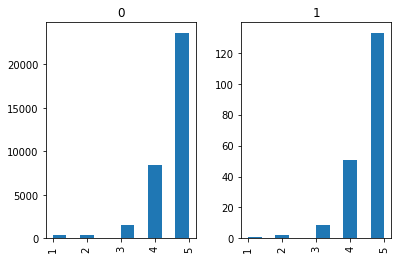

In [8]:
df_review['bulk']= df_review['username'].apply(lambda x : 1 if x in bulk.index else 0)
print(df_review.rating.hist(by=df_review.bulk))
print(df_review[df_review.bulk==1].rating.describe())
print(df_review[df_review.bulk==0].rating.describe())

**Observation**

The bulk users have the same distribution in ratings as the other users, so the chance of them being fraudulent is slim.

**Calculating the NPS Score**

 NPS score of firettab is : 77.08


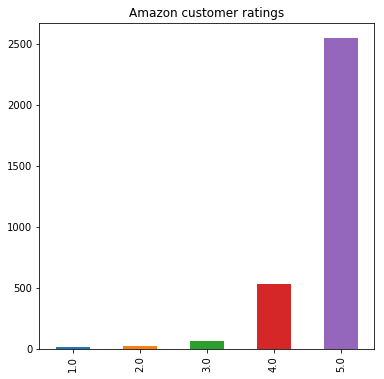

In [7]:
kindle_rating = kindle_product.rating.value_counts()
kindle_rating.sort_index(inplace=True)

kindle_NPS_score = round (100*(kindle_rating[5]-sum(kindle_rating[1:3]))/sum(kindle_rating),2)
print (" NPS score of firettab is : "  + str(kindle_NPS_score))
#better NPS than overall amazon
kindle_rating.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6))

In [8]:
# Making a new dataframe with all relevant columns

kindle_comments = pd.concat([kindle_product['text']+". "+ kindle_product['title'],kindle_product['rating'],kindle_product['doRecommend']],axis=1)

In [9]:
kindle_comments.columns=['text','rating','recommend']

kindle_comments.head()

,text,rating,recommend
17214,Its a nice little set up but it's slow. I wish...,3.0,True
17215,As long as apps are downloaded before leaving ...,5.0,True
17216,Was a gift for our 8 year old daughter. Great ...,5.0,True
17217,my grandkids love it. This is the 3 one we bou...,5.0,True
17218,Great case ok tablet no Android play store. We...,3.0,True


**Helpful Functions for cleaning text data**

In [10]:
import unicodedata
import re


def product_name(name): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', name)
    cleantext = str(cleantext).lower()
    cleaned = re.sub(r'[?|!|\'|"|#|$|%]',r'',cleantext)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = str(cleaned).lower()
    
    #removing accented characters
    cleaned = unicodedata.normalize('NFKD', cleaned).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    return cleaned

reviews=kindle_comments['text']
clean_names=[]


for name in reviews:
    cleaning=product_name(name)
    clean_names.append(cleaning)
print(clean_names)

['its a nice little set up but its slow  i wish i would have investigated them a little more before just jumping in   i like it but    ', 'as long as apps are downloaded before leaving wifi they work great for road trips or hunting trips  great for road trips', 'was a gift for our 8 year old daughter  great for kids  great for kids', 'my grandkids love it  this is the 3 one we bought   kids love it', 'great case ok tablet no android play store  weak micro usb port  its isnt an straight out the box tablet  had to install android play store on it  and as far as the charging port goes im on my 3rd one but best buy are the best with their return policy     tablet not for kids', 'grandson became board with what it offers  plug wears out fast  good for young kids', 'this product wouldnt turn on nor charge and then store couldnt locate another one for me   product issues', 'grand daughter is two years old and watches her older brother and sister use their ipads  so we got her the amazon fire 

In [11]:
column_values =pd.DataFrame(clean_names)
#column_values
kindle_comments.head()
kindle_comments = kindle_comments[['text','rating','recommend']]
kindle_comments.head()

,text,rating,recommend
17214,Its a nice little set up but it's slow. I wish...,3.0,True
17215,As long as apps are downloaded before leaving ...,5.0,True
17216,Was a gift for our 8 year old daughter. Great ...,5.0,True
17217,my grandkids love it. This is the 3 one we bou...,5.0,True
17218,Great case ok tablet no Android play store. We...,3.0,True


In [12]:
column_values.columns=['cleanreview']

In [13]:
column_values.index=kindle_comments.index

**Adding "Cleanreview" colum to our dataframe**

In [14]:
df_kindleclean = pd.concat([column_values,kindle_comments], axis=1)
df_kindleclean.drop('text', axis=1, inplace=True)
df_kindleclean.head()

,cleanreview,rating,recommend
17214,its a nice little set up but its slow i wish ...,3.0,True
17215,as long as apps are downloaded before leaving ...,5.0,True
17216,was a gift for our 8 year old daughter great ...,5.0,True
17217,my grandkids love it this is the 3 one we bou...,5.0,True
17218,great case ok tablet no android play store we...,3.0,True


**Adding a sentiment column**

In [15]:
#finding sentiment of reviews in X_test_kindle

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']

In [17]:
df_kindleclean['sentiment']= df_kindleclean['cleanreview'].apply(lambda x : sentiment(x))

In [18]:
df_kindleclean.head()

,cleanreview,rating,recommend,sentiment
17214,its a nice little set up but its slow i wish ...,3.0,True,0.8271
17215,as long as apps are downloaded before leaving ...,5.0,True,0.8481
17216,was a gift for our 8 year old daughter great ...,5.0,True,0.9022
17217,my grandkids love it this is the 3 one we bou...,5.0,True,0.8555
17218,great case ok tablet no android play store we...,3.0,True,0.9457


In [21]:
#df_kindleclean['expsenti'] = np.exp(df_kindleclean['sentiment'])
#df_kindleclean=df_kindleclean.drop('recommend', axis=1)
#df_kindleclean=df_kindleclean.drop('rating', axis=1)
df_kindleclean=df_kindleclean.drop('sentiment', axis=1)

In [22]:
df_kindleclean.head()

,cleanreview,expsenti
17214,its a nice little set up but its slow i wish ...,2.286678
17215,as long as apps are downloaded before leaving ...,2.335206
17216,was a gift for our 8 year old daughter great ...,2.465020
17217,my grandkids love it this is the 3 one we bou...,2.352550
17218,great case ok tablet no android play store we...,2.574615


**Splitting a dataset**

In [23]:
from sklearn.model_selection import train_test_split
X=df_kindleclean.loc[:,df_kindleclean.columns!='expsenti']
y=df_kindleclean.loc[:,df_kindleclean.columns=='expsenti']


X_train_kindle, X_test_kindle ,y_train_kindle,y_test_kindle= train_test_split(X,y,test_size=0.2)

**Converting the text to a sparse matrix**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import SnowballStemmer
import string
import nltk
from nltk import PorterStemmer
import re 

In [25]:
stop = set(stopwords.words('english')) #set of stopwords
stemmer = SnowballStemmer("english")

In [26]:
def stem(doc, tkpat=re.compile('\\b[a-z][a-z][a-z][a-z]+\\b')):
    return [stemmer.stem(token) for token in tkpat.findall(doc)]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

additional_stopwords_list=['the','to','and','it','in','or','no','are','use','want','wife','husband','son','daughter','grandson','gift','read','kindle','easy','christmas','kid','his','her','their','them','great','recommend','amazom','love','like','easy','kindl','bought','penny','good','perfect','tablet','awesome','purchase','christmas','product','easy','amazon','easy']
my_stop_words = text.ENGLISH_STOP_WORDS.union(additional_stopwords_list)

In [60]:
vectorizer_stem = CountVectorizer(max_df=0.90,min_df=5,ngram_range=(2,3),tokenizer=stem,stop_words=my_stop_words,strip_accents='ascii',binary=True)

In [61]:
textfeatures_train=vectorizer_stem.fit_transform(X_train_kindle['cleanreview'])

/Users/shwetapai/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'awesom', 'becam', 'becaus', 'becom', 'befor', 'besid', 'christma', 'describ', 'dure', 'easi', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'penni', 'perhap', 'pleas', 'purchas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'yourselv'] not in stop_words.
  sorted(inconsistent))


In [31]:
#countvectorizing the test set
textfeatures_test=vectorizer_stem.transform(X_test_kindle['cleanreview'])


**Dimensionality Reduction**

In [117]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=8, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [118]:
lda_train = lda.fit_transform(textfeatures_train)
lda_test=lda.transform(textfeatures_test)


/Users/shwetapai/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


**Adding "sentiment" column from our original dataset to our output from LDA**

In [119]:
# column names
topicnames = ["Topic" + str(i) for i in range(lda.n_topics)]
docnames = ["Doc" + str(i) for i in range(len(X_train_kindle['cleanreview']))]

**"Training" dataset**

In [120]:
import numpy as np
# Make the pandas dataframe
df_train = pd.DataFrame(np.round(lda_train, 2), columns=topicnames, index=docnames)
df_train.shape

(2540, 8)

In [121]:
df_train.index=y_train_kindle.index
df_trainset = pd.concat([df_train ,y_train_kindle], axis=1)
df_trainset.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,expsenti
17499,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,2.204719
18908,0.60,0.03,0.03,0.03,0.25,0.03,0.03,0.03,2.463542
18723,0.06,0.06,0.06,0.06,0.56,0.06,0.06,0.06,2.608825
19548,0.03,0.03,0.03,0.03,0.47,0.34,0.03,0.03,2.430750
20182,0.04,0.04,0.04,0.71,0.04,0.04,0.04,0.04,2.001106


**Testing Datasset**

In [122]:
#testing set
# column names
topicnames_test = ["Topic" + str(i) for i in range(lda.n_topics)]
docnames_test = ["Doc" + str(i) for i in range(len(X_test_kindle['cleanreview']))]

In [123]:
df_test = pd.DataFrame(np.round(lda_test, 2), columns=topicnames, index=docnames_test)
df_test.shape

(636, 8)

In [124]:
df_test.index=y_test_kindle.index
df_test = pd.concat([df_test ,y_test_kindle], axis=1)
df_test.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,expsenti
18489,0.01,0.01,0.01,0.01,0.13,0.80,0.01,0.01,2.316135
18769,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,2.316830
20138,0.06,0.06,0.06,0.06,0.56,0.06,0.06,0.06,2.014357
19005,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,2.587003
18296,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,2.469955


**Random Forest Regressor**

In [125]:
from sklearn.model_selection import train_test_split

X_train=df_trainset.loc[:,df_trainset.columns!='expsenti']
y_train=df_trainset.loc[:,df_trainset.columns=='expsenti']
X_test=df_test.loc[:,df_test.columns!='expsenti']
y_test=df_test.loc[:,df_test.columns=='expsenti']

from sklearn.preprocessing import StandardScaler


#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)


#scaler = StandardScaler().fit(X_test)
#rescaledX = scaler.transform(X_test)


In [126]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [127]:
rf.fit(X_train,y_train)


/Users/shwetapai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [128]:
y_pred=rf.predict(X_test)

In [129]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

**Finding imp features from the regression**

In [137]:
feature_importances

,importance
Topic0,0.168237
Topic6,0.139244
Topic1,0.133104
Topic7,0.132660
Topic3,0.117540
Topic4,0.111051
Topic2,0.101835
Topic5,0.096329


In [131]:
feature_importances.index

Index(['Topic0', 'Topic6', 'Topic1', 'Topic7', 'Topic3', 'Topic4', 'Topic2',
       'Topic5'],
      dtype='object')

In [149]:
list_topic=['Battery Life','Screen','Back Light', 'Light Weight', 'E books']
list_coeff=[0.168,0.139,0.133,0.1,0.09]
df_list = pd.DataFrame(
    {'Topic': list_topic,
     'Coeff': list_coeff
    })

df_list=df_list.sort_values(['Coeff'], ascending=[True])
df_list.head()

,Topic,Coeff
4,E books,0.090
3,Light Weight,0.100
2,Back Light,0.133
1,Screen,0.139
0,Battery Life,0.168


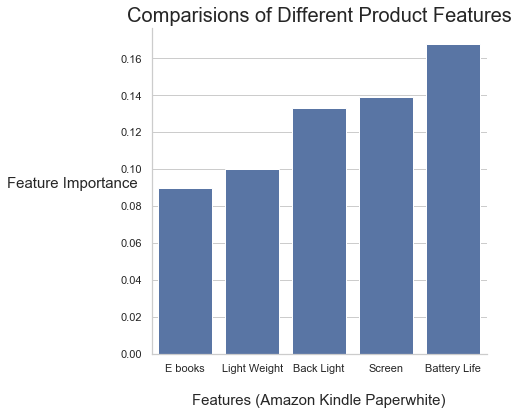

In [151]:
import seaborn as sns
from seaborn import despine
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6))
fig=sns.barplot(x="Topic", y="Coeff", data=df_list,
            label="Comparision of features", color="b")
#for index, row in df_list.iterrows():
    #fig.text(row.name,row.Cost, round(row.Cost,2), color='black', ha="center")
plt.xlabel("Features (Amazon Kindle Paperwhite)",fontsize=15,labelpad=20)
plt.ylabel("Feature Importance",rotation=0,labelpad=48,fontsize=15)
plt.title("Comparisions of Different Product Features",fontsize=20)
despine()

**Visualizing topics from LDA Output**

In [56]:
import pyLDAvis
import pyLDAvis.sklearn

In [57]:
pyLDAvis.enable_notebook()

In [133]:
panel = pyLDAvis.sklearn.prepare(lda,textfeatures_train,vectorizer_stem, mds='tsne')
panel

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
5       1.051146 -109.544922       1        1  16.978498
4      98.084137  -44.137829       2        1  16.023747
0      12.724784   35.908749       3        1  15.381909
3     -41.123833   -0.390664       4        1  12.965737
1      65.317314 -100.206497       5        1  10.479039
2      74.678947   16.439051       6        1  10.173135
6     -46.320381  -65.123962       7        1   9.432207
7      23.487764  -38.150581       8        1   8.565729, topic_info=     Category        Freq                Term       Total  loglift  logprob
term                                                                       
411   Default  107.000000         paper white  107.000000  30.0000  30.0000
34    Default  153.000000        batteri life  153.000000  29.0000  29.0000
342   Default   73.000000        light weight   73.000000  28.0000  28.0000
570   Default   84.000000           veri easi   84.000000  27.0000  27.0000
192   Default   78.000000            easi eye   78.000000  26.0000  26.0000
61    Default   58.000000         best reader   58.000000  25.0000  25.0000
170   Default   45.000000       download book   45.000000  24.0000  24.0000
238   Default   33.000000        excel reader   33.000000  23.0000  23.0000
358   Default   40.000000           long time   40.000000  22.0000  22.0000
575   Default   40.000000          veri happi   40.000000  21.0000  21.0000
559   Default   33.000000        touch screen   33.000000  20.0000  20.0000
566   Default   32.000000         user friend   32.000000  19.0000  19.0000
578   Default   29.000000          veri light   29.000000  18.0000  18.0000
507   Default   24.000000         screen easi   24.000000  17.0000  17.0000
356   Default   32.000000        long batteri   32.000000  16.0000  16.0000
183   Default   34.000000          easi carri   34.000000  15.0000  15.0000
116   Default   23.000000     bright sunlight   23.000000  14.0000  14.0000
597   Default   28.000000         weight easi   28.000000  13.0000  13.0000
188   Default   32.000000           easi easi   32.000000  12.0000  12.0000
118   Default   20.000000         built light   20.000000  11.0000  11.0000
357   Default   29.000000   long batteri life   29.000000  10.0000  10.0000
585   Default   19.000000          veri pleas   19.000000   9.0000   9.0000
9     Default   20.000000         actual book   20.000000   8.0000   8.0000
21    Default   35.000000         avid reader   35.000000   7.0000   7.0000
343   Default   25.000000   light weight easi   25.000000   6.0000   6.0000
264   Default   25.000000           font size   25.000000   5.0000   5.0000
214   Default   19.000000        ebook reader   19.000000   4.0000   4.0000
210   Default   21.000000          easier eye   21.000000   3.0000   3.0000
545   Default   17.000000          strain eye   17.000000   2.0000   2.0000
366   Default   26.000000           make easi   26.000000   1.0000   1.0000
...       ...         ...                 ...         ...      ...      ...
543    Topic8    7.274362          spend time    8.175951   2.3406  -4.3011
482    Topic8    7.956479       reader reader    8.956842   2.3390  -4.2115
448    Topic8    6.381957       pleas purchas    7.284590   2.3251  -4.4320
9      Topic8   18.187845         actual book   20.794121   2.3235  -3.3847
209    Topic8    6.195498           easi work    7.086026   2.3231  -4.4617
422    Topic8    6.147670      paperwhit dark    7.037979   2.3222  -4.4694
579    Topic8    6.168078     veri light easi    7.075429   2.3202  -4.4661
291    Topic8   11.623342           just book   13.519880   2.3063  -3.8325
624    Topic8    5.280440    year granddaught    6.154681   2.3042  -4.6215
403    Topic8    5.268670     onli thing dont    6.146581   2.3033  -4.6237
394    Topic8    5.233993     older paperwhit    6.127439   2.2998  -4.6303
134    Topic8    5.365914          clear ea